# Final Project # DAB-200 # Fake News prediction using Multinomial NB and Support Vector Machine .

Group members:
- Name (ID): Sai Sahas Elluru (0753808)
- Name (ID): Hari Sai Palem (0747511)
- Name (ID): Siddharth Singh (0756590)

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importing the required libraries for the model

In [60]:
true_news = pd.read_csv("True.csv")
fake_news = pd.read_csv("Fake.csv")

This dataset is about determining whether the given news is fake or real. We picked this dataset from Kaggle. It has 2 files'True.csv' and 'Fake.csv.' These 2 files consists news articles from 2015 to 2017. 

It has 4 columns which are
title - Title of the news article
Text - Main news in the article
subject - subject of the article
date - date published

Using pandas we imported the files into variables true_news and fake_news.

In [61]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [62]:
true_news['label'] = 1
fake_news['label'] = 0

In [63]:
news = pd.concat([true_news, fake_news])

Before combining the 2 datasets into one dataset, we created new columns in both datasets which will determine its status. The new column is 'label', value is 1 for true_news and 0 for fake_news. Using pandas to concat the true_news and fake_news datasets.

<AxesSubplot:xlabel='label', ylabel='count'>

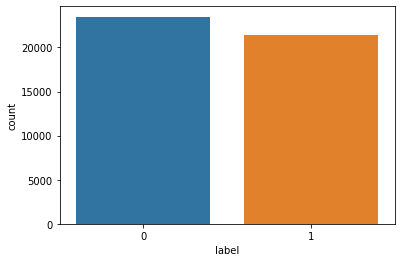

In [64]:
sns.countplot(news.label)

Using seaborn library we plotted the distribution of fake and true news. From the plot it is clear the distribution is almost eaqual.

In [65]:
news.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

Checking for null values so that these values will not affect the model. This function gave that there are no null values, but is it true. Even a space is considered as value.

In [66]:
empty_text_fake = []
for index, text in enumerate(fake_news.text.values):
    if str(text).strip() == '':
        empty_text_fake.append(index)
print(f"Number of rows with balnk text : {len(empty_text_fake)}")
fake_news.iloc[empty_text_fake]
    

Number of rows with balnk text : 630


,title,text,subject,date,label
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017",0
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017",0
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017",0
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017",0
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017",0
...,...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015",0
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015",0
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015",0
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015",0


Using for loop we are checking whether there are empty values in the text column of fake_news dataset. And yes there are 630 rows which has no text in it except for a space. Should we delete these rows? No, though it shows there is no text in the column it seems entire text is in the title column. So, to solve this we should just merge text and title columns.

In [67]:
empty_text_true = []
for index, text in enumerate(true_news.text.values):
    if str(text).strip() == '':
        empty_text_true.append(index)
print(f"Number of rows with balnk text : {len(empty_text_true)}")
true_news.iloc[empty_text_true]

Number of rows with balnk text : 1


,title,text,subject,date,label
8970,Graphic: Supreme Court roundup,,politicsNews,"June 16, 2016",1


Same thing has been done with true_news dataset we are checking whether there are any rows with empty text using for loop. There is only 1 row with empty text. But in this case we delete that particular row because title column does not consist of text.

In [68]:
news = news.drop(8970, axis = 0)


We have dropped the row with empty text by using index number 8970

In [69]:
news_subject=news.groupby(['subject', 'label'])['text'].count()
news_subject

subject          label
Government News  0         1570
Middle-east      0          778
News             0         9049
US_News          0          783
left-news        0         4459
politics         0         6841
politicsNews     1        11271
worldnews        1        10145
Name: text, dtype: int64

Using groupby command we are going to see the distribution of true and fake news by diefferent subject. From the above result it is clear that there are 6 diffrent subjects for fake news but only 2 subjects for true news.

In [70]:
news_subject = news_subject.unstack().fillna(0)
news_subject

label,0,1
subject,,
Government News,1570.0,0.0
Middle-east,778.0,0.0
News,9049.0,0.0
US_News,783.0,0.0
left-news,4459.0,0.0
politics,6841.0,0.0
politicsNews,0.0,11271.0
worldnews,0.0,10145.0


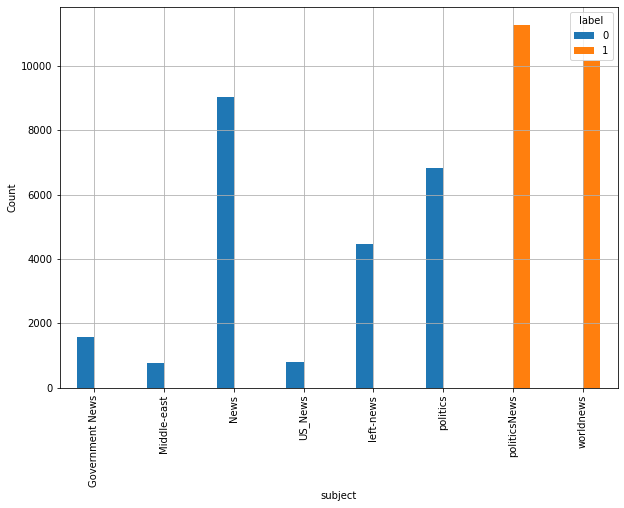

In [71]:
fig = news_subject.plot(kind='bar',figsize=(10, 7),grid=True)
fig.set_ylabel('Count')
plt.show()

Using unstack function and fillna function we are going to make it as a table with 2 columns which are 0 and 1 and subjects as rows. Then plotting this data into bar plot to show number of rows in different subject and using legend to determine to which catergory these subjects belong to.

In [72]:
news_subject['Tot_count']=news_subject[0]+news_subject[1]
news_subject

label,0,1,Tot_count
subject,,,
Government News,1570.0,0.0,1570.0
Middle-east,778.0,0.0,778.0
News,9049.0,0.0,9049.0
US_News,783.0,0.0,783.0
left-news,4459.0,0.0,4459.0
politics,6841.0,0.0,6841.0
politicsNews,0.0,11271.0,11271.0
worldnews,0.0,10145.0,10145.0


C:\Users\saisa\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


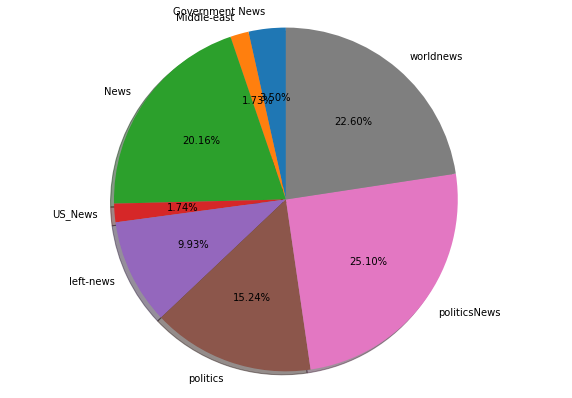

In [73]:
import matplotlib.pyplot as plt 
labels = news_subject.index
values = news_subject['Tot_count']
fig2, ax = plt.subplots(figsize =(10, 7))
ax.pie(values, labels=labels, shadow=True, autopct='%.2f%%', startangle=90)
ax.axis('equal')
fig2.show()

Creating a new column called tot_count to the newly created table which shows subjects and its distribution of true and fake news. And then using matplotlib we have created a pie plot to see the percent divide of differnt subjects in the news dataset.
This gives that politicsNews and worldnews occupy around 50% of dataset and these 2 subjects belong to fake news. So, using subject as a feature will affect the accuracy of the model. We will combine it with the text column.

In [74]:
news['Article'] = news['title']+ ' ' +news['text']+ ' ' +news['subject']

In [75]:
news = news.drop('title',axis=1)

In [76]:
news = news.drop("text",axis=1)
news = news.drop("subject",axis=1)

We have seen how there are empty text in around 630 rows and also determined that these texts are in the title of the document itself. And we also determined that, there is a imbalance with distribution of subjects between true and fake news.

So, to avoid making a model with less accuracy we are merging the coulumns 'title', 'text' & 'subject' into one column and name it as 'Article.' Now the model will not be affected because we are going to perform text pre processing on the data.

We have also dropped the old columns 'title', 'text', and 'subject'

In [77]:
news = news.sample(frac=.1)

In [78]:
news.shape

(4490, 3)

<AxesSubplot:xlabel='label', ylabel='count'>

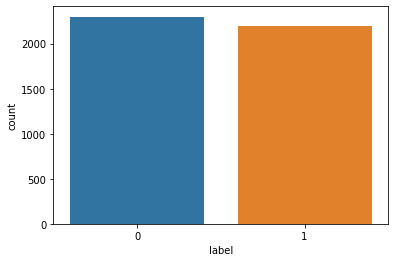

In [79]:
sns.countplot(news.label)

Original dataset has around 44890 rows after concatenating both true_news dataset and fake_news dataset. With these many rows prcess is being slowed down while text preprocessing. So, we are taking only 10% of total rows. Now the dataset has 4489 rows and 3 columns.

We are plotting the distribution of fake and true news using seaborn library. This is to check if there is any imbalance in the dataset after taking 10% of the whole.

In [84]:
news= news.reset_index()

# Text preprocessing

Text Preprocessing is a process to convert the text from human language to machine readable version. We are going to use a new library called NLTK(Natural Language Tool Kit). It is a open source NLP library which contains packages to convert human lanuage to machine readable version.

### Converting into lowercase

In [85]:
news.Article = news.Article.apply(lambda x: " ".join(x.lower() for x in x.split()))
news.Article.head()

0    viral video of ‘liberal redneck’ hilariously d...
1    palestinians seethe at trump's 'insane' jerusa...
2    u.s. lawmakers press heritage pharma on high p...
3    german minister says global climate deal will ...
4    episode #6 – drive by wire: ‘syria wmd redux?’...
Name: Article, dtype: object

We are converting text in all documents into lowercase. This is to reduce the importance to unwanted words.

### Removing Punctuations

In [86]:
news.Article = news.Article.str.replace('[^\w\s]','')
news.Article.head()

0    viral video of liberal redneck hilariously des...
1    palestinians seethe at trumps insane jerusalem...
2    us lawmakers press heritage pharma on high pri...
3    german minister says global climate deal will ...
4    episode 6  drive by wire syria wmd redux part ...
Name: Article, dtype: object

Removing punctuations will help tokenize the words simpler.

### Removing Stop Words

In [87]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
news.Article = news.Article.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
news.Article.head()

0    viral video liberal redneck hilariously destro...
1    palestinians seethe trumps insane jerusalem mo...
2    us lawmakers press heritage pharma high prices...
3    german minister says global climate deal survi...
4    episode 6 drive wire syria wmd redux part 1 me...
Name: Article, dtype: object

Stop words are the most common and frequent words in the language like in, is, as, the etc. These words have no importance and these are repeated many times in a document. So we remove these stop words before model creating.

### Removing numbers

In [88]:
news.Article = news.Article.apply(lambda x: " ".join(x for x in x.split() if not x.isdigit()))

In [89]:
news.Article

0       viral video liberal redneck hilariously destro...
1       palestinians seethe trumps insane jerusalem mo...
2       us lawmakers press heritage pharma high prices...
3       german minister says global climate deal survi...
4       episode drive wire syria wmd redux part member...
                              ...                        
4485    stranger things hollywood mk ultra goes full o...
4486    early say uk made sufficient progress brexit t...
4487    obamas embarrassing farewell interview mom hip...
4488    brexit would hurt britain eu global economy wh...
4489    let reparations begin rahm emanuel uses millio...
Name: Article, Length: 4490, dtype: object

Having numbers will effect the performance of vectoriztion as well gets unwanted importance to these numbers. We use short hand for loop to remove the numbers.

In [90]:
url = "http"
filter1 = news['date'].str.contains(url)
news = news[~filter1]
news['date'] = pd.to_datetime(news['date'])

In [91]:
news.shape

(4488, 4)

In this dataset date column has no particular format. So, we tried converting the date column into standard format. But we got an error saying 'cannot convert 'https .....'. So we filtered out those rows made the columns to standard date format.

In [92]:
import nltk
from nltk.stem import WordNetLemmatizer
LT = WordNetLemmatizer()
for index, row in news.iterrows():
    filter_line = ' '
    line = row['Article']
    words = nltk.word_tokenize(line) #tokenization
    for word in words:
        filter_line = filter_line + ' ' + str(LT.lemmatize(word))
    news.loc[index,'Article'] = filter_line

Lemmatization is the process to cut down the words to its core root. It is a calculating way of cutting down words to their standard dictionory form. We are also performing tokenization, it is the process to split the given text into smaller pieces called tokens. We used nested for loop to perform both tokeniztion and lemmatization.

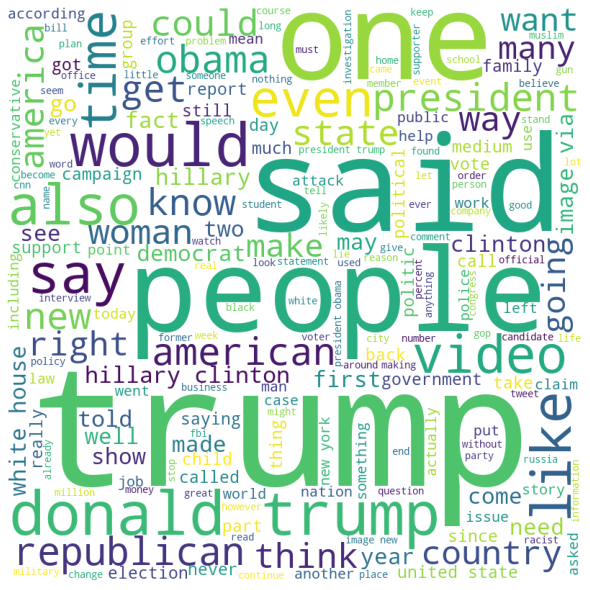

In [93]:
from wordcloud import WordCloud
fake_words = ''
for values in news[news['label'] == 0].Article:
    values = str(values)
    split_values = values.split()
    fake_words += " ".join(split_values)+ " "
    
WC = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop, 
                min_font_size = 10).generate(fake_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(WC) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

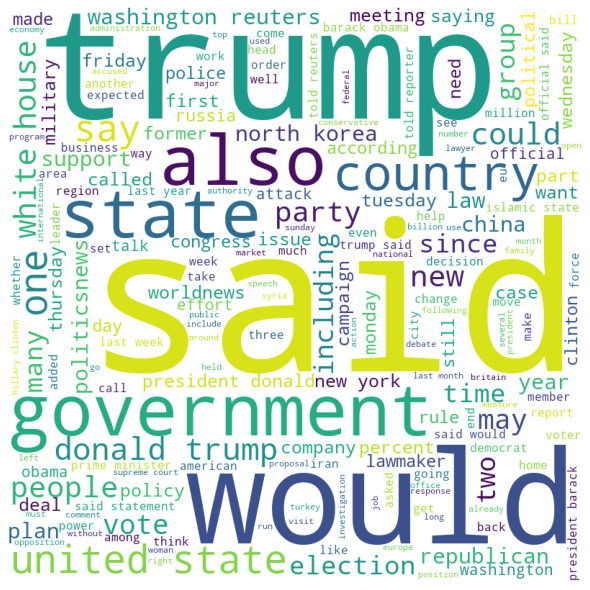

In [94]:
true_words = ''
for values in news[news['label'] == 1].Article:
    values = str(values)
    split_values = values.split()
    true_words += " ".join(split_values)+ " "
    
WC = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop, 
                min_font_size = 10).generate(true_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(WC) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Using for loop and matplotlib we have plotted word cloud for fake news and true news. This word cloud shows the most frequent words in terms of its size. Most frequent word used in both true news and fake news is 'trump'

### top 10 words frequency

In [95]:
freq = pd.Series(' '.join(news.Article).split()).value_counts()[:10]
freq

trump         13970
said          13002
u              7018
state          5697
would          5478
president      5174
people         4268
republican     4051
one            3745
year           3411
dtype: int64

### removing unwanted words

In [96]:
news.Article = news.Article.apply(lambda x: " ".join(x for x in x.split() if x not in freq))
news.Article.head()

0    viral video liberal redneck hilariously destro...
1    palestinian seethe insane jerusalem move jerus...
2    lawmaker press heritage pharma high price anti...
3    german minister say global climate deal surviv...
4    episode drive wire syria wmd redux part member...
Name: Article, dtype: object

### frequency of rare words

In [97]:
freq2 = pd.Series(' '.join(news.Article).split()).value_counts()[-10:]
freq2

reidhouse       1
nytimescomm     1
nonclinical     1
chadian         1
horsesin        1
betterfunded    1
paternalism     1
70000student    1
statesford      1
avoidable       1
dtype: int64

### removing unwanted words

In [98]:
news.Article = news.Article.apply(lambda x: " ".join(x for x in x.split() if x not in freq2))
news.Article.head()

0    viral video liberal redneck hilariously destro...
1    palestinian seethe insane jerusalem move jerus...
2    lawmaker press heritage pharma high price anti...
3    german minister say global climate deal surviv...
4    episode drive wire syria wmd redux part member...
Name: Article, dtype: object

In [99]:
freq3 = pd.Series(' '.join(news.Article).split()).value_counts()[:10]
freq3

new           3284
also          3163
news          3027
government    2961
clinton       2958
house         2916
reuters       2909
obama         2899
say           2885
donald        2852
dtype: int64

In [100]:
news.drop('index',axis=1,inplace=True)

In [101]:
print(news.head())
print(news.shape)

        date  label                                            Article
0 2016-04-21      0  viral video liberal redneck hilariously destro...
1 2017-12-06      1  palestinian seethe insane jerusalem move jerus...
2 2016-12-16      1  lawmaker press heritage pharma high price anti...
3 2017-06-02      1  german minister say global climate deal surviv...
4 2017-04-07      0  episode drive wire syria wmd redux part member...
(4488, 3)


In [102]:
y= news.label.values

In [103]:
x1 = news.Article

In [104]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [105]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(x1)
freq_term_matrix = count_vectorizer.transform(x1)
tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
X = tfidf.fit_transform(freq_term_matrix)

TF-IDF is an ML algorithm which is used to transform text into meaningful represtation of numbers which is used to fit the ML algorithm for prediction. This is done using the libraries from sklearn package. We first use count vectorizer to count the wrods in the document and their frequency. We fit and transform the text in this count vectorizer. Then we use tfidf transformer to fit and transform the text values counted by count vectorizer into frequency term matrix. Term frequency is number of times a perticular word appears in the document divided by total number of words in that document. IDF is log of number of documents divided by number of documents with a perticular word.

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=590)

We use sklearn train test split to split the data into train and test using default values. And the split is done for the values in 'X' and 'y'. 'X' the variable which we created after feature vectorizing the text and 'y' is the values of labels in the news dataframe.

In [108]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
NB = MultinomialNB()
NB_cross_val_score = cross_val_score(NB,X,y,cv=10).mean()
print("Cross val score is", NB_cross_val_score)
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)

Cross val score is 0.931150075564747


We are importing MultinomialNB from sklearn package and fitting the train data. We use this model to predict the labels for x_test. MNB calculates the likelihood of a event occuring with an other event already determined.

In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9358288770053476

We have imported accuracy score metric from sklearn package to claculate the accuracy. The accuracy for predicting whether the given news article is fake or true using MultiNomial Naive Bayes classifier is 94.03%. Which is pretty good for a ML model.

In [110]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
cm

array([[515,  27],
       [ 45, 535]], dtype=int64)

A confusion matix is performance metric for ML classification problem. It is table with 4 differnt value of the classes. True Positive, True Negative, False Positive, and False Negative

True Positive :for example if machine predicted true for true article

True Negative : If machine predicts fake for fake article

False Positive: It is also called a Type-1 error. If machine predicts true for fake article

False Negative: It is also called a Type-2 error. If machine predicts fake for true article

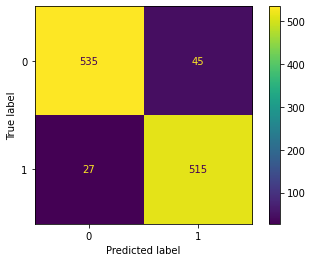

In [111]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(NB, X_test, y_test)
plt.show()

We have plotted the heat map for confusion matrix using plot confusion matrix from sklearn package. 

TP = 529, TN = 527

FP = 32, FN = 35

We can use these 4 values and calculate precison, recall, f1-score and support of the classification.

In [112]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.95      0.92      0.94       580
           1       0.92      0.95      0.93       542

    accuracy                           0.94      1122
   macro avg       0.94      0.94      0.94      1122
weighted avg       0.94      0.94      0.94      1122



We imported classification report from sklearn library to see the precision, recall, f1-score and support values for the model.
From confusion matrix plot above for the MNB, 529 articles are predicted as true news and which are actually true. Only 32 articles are predicted as true news, but in actual these are fake news. Likewise, 527 articles are predicted as fake news which are actually fake. 35 articles are predicted as fake news, but in reality these are true news.

In [113]:
from sklearn import svm
clf = svm.SVC(kernel = 'linear', C=1, random_state=590)
SVM_cross_val_score = cross_val_score(clf,X,y,cv=10).mean()
print("Cross val score ", SVM_cross_val_score)
clf.fit(X_train,y_train)
y_pred_svm = clf.predict(X_test)
acc = accuracy_score(y_test,y_pred_svm)
print("Accuracy is", acc)

Cross val score  0.9893051026089724
Accuracy is 0.9937611408199644


We are importing SVM classifier from sklearn package and fit the model with training data. We are going to predict the labels for the X_test values. The main objective in SVM is to find the optimal hyperplane which classifies the data points of different classes.

The accuracy score for SVM classifier for predicting whether a given article is fake or true is 97.32%. Which is really good for a classifier ML model.

In [114]:
cm1 = confusion_matrix(y_test, y_pred_svm, labels=[1, 0])
cm1

array([[538,   4],
       [  3, 577]], dtype=int64)

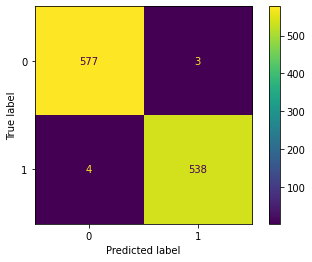

In [115]:
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

As we did above for MNB, we are calculating and ploting the confusion matrix for SVM classifier. 

TP = 549, TN = 544

FP = 12, FN = 18

We will calculate Precision, recall, f1-score and support using these 4 values.

In [116]:
report1 = classification_report(y_test, y_pred_svm)
print(report1)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       580
           1       0.99      0.99      0.99       542

    accuracy                           0.99      1122
   macro avg       0.99      0.99      0.99      1122
weighted avg       0.99      0.99      0.99      1122



From confusion matrix plot above for the MNB, 517 articles are predicted as true news and which are actually true. Only 3 articles are predicted as true news, but in actual these are fake news. Likewise, 588 articles are predicted as fake news which are actually fake. 15 articles are predicted as fake news, but in reality these are true news.